# 深層学習day2

# 勾配消失問題

### 確認テスト①
#### Q.
$$
z=t^2\\t=x+y
$$
連鎖律の原理を使い、dz/dxを求めよ。
#### A.
$
\frac{\partial z}{\partial x}
=\frac{\partial z}{\partial t}\frac{\partial t}{\partial x}
=2t\\
=2(x+y)
$
___

### 勾配消失問題の復習
* 誤差逆伝播法が下位層に進んでいくに連れて、勾配がどんどん緩やかになっていく
* 勾配降下法による、更新では下位層のパラメータはほとんど変わらず、訓練は最適値に収束しなくなる
* sigmoid関数で起きやすい
___

### シグモイド関数
$$\sigma(x)=\frac1{1+e^{-x}}$$
* 2値分類の出力層に使われる
* 0 ~ 1の間を緩やかに変化する関数で、ステップ関数ではON/OFFしかない状態に対し、信号の強弱を伝えられるようになり、予想ニューラルネットワーク普及のきっかけとなった
* 課題...大きな値では出力の変化が微小なため、勾配消失問題を引き起こす事があった
___

### 確認テスト②
#### Q.
シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
#### A.
$
\sigma(0)=0.5\\
\frac{\partial \sigma(x)}{\partial x}=\sigma(x)(1-\sigma(x))
$

より、(2)0.25
___

### 勾配消失の解決法
* 活性化関数の選択
* 重みの初期値設定
* バッチ正規化
___

### Relu関数
$$
f(x) = 
\left\{
\begin{array}{ll}x & (x>0) \\
0 & (x \leq 0)
\end{array}
\right.$$
* 今最も使われている活性化関数
* 勾配消失問題の回避とスパース化に貢献することで良い成果をもたらしている
___

### 重みの初期値 -Xavier
* 対応の活性化関数...Relu関数、シグモイド関数、双曲線正接関数
* 初期値の設定方法...**重みの要素を、前の層のノード数の平方根で除算した値**
___

### 重みの初期値 -He
* 対応の活性化関数...Relu関数
* 初期値の設定方法...**重みの要素を、前の層のノード数の平方根で除算した値**に対し√２をかけ合わせた値
___

### 確認テスト③
#### Q.
重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。
#### A.
全ての重みの値が均一に更新される。正しく学習が行われない可能性がある。
___

### バッチ正規化
* ミニバッチ単位で、入力値のデータの偏りを抑制する手法
* 活性化関数に値を渡す前後に、バッチ正規化の処理を孕んだ層を加える
___

### 確認テスト④
#### Q.
一般的に考えられるバッチ正規化の効果を2点挙げよ。
#### A.
1. 中間層の重みの更新が安定化され学習速度が上がる
2. 過学習が起きにくい(ドロップアウトとの相性は悪いとの記事もある)
___

### ハンズオン

In [22]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet

* 必要なライブラリのインポート
* 結局、配布されたものを自作ライブラリとしてインポートすることにした

In [23]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


* データの読み込み後、サイズを出力
* 前処理に関する部分は、自作モジュール内に記載されている

In [24]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu',
                        weight_init_std=0.01)

* 多層ネットワークの初期化
* 活性化関数...Relu
* 初期化方法...ランダム(設定なし)

In [25]:
iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
plot_interval=10

* ハイパーパラメータを定義
* その他必要なパラメータを定義

In [26]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        # print('accuracy_train{}:'.format(i+1), str(accr_train))
        # print('accuracy_test{}:'.format(i+1), str(accr_test))

* Relu関数で、実際に学習
* 学習履歴の出力は省略する

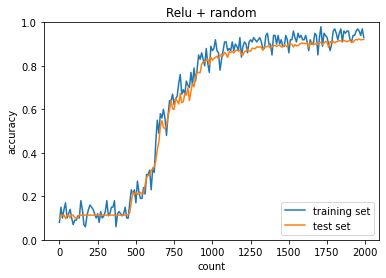

In [27]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("Relu + random")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 途中からではあるが、学習が進み、正解率もかなり高く収束している

In [28]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu',
                        weight_init_std='He')

* Relu+Heを試す

In [29]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

* パラメータ類は同じものを使用

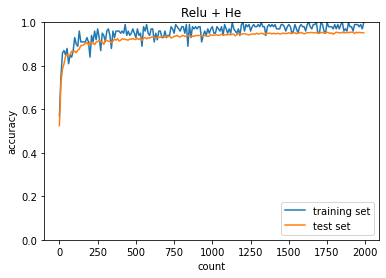

In [30]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("Relu + He")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 早い時点で、学習が進んでいるのがわかる
* 正解率も、初期値の設定をしなかった結果に比べて、高い
___

# 学習率最適化手法

### 学習率の決め方
* 学習率最適化手法(オプティマイザ)を利用して、学習率を最適化
* 初期の学習率を大きくし、徐々に小さくしていくのが主流
___

### 勾配降下法(参考)
$$w^{t+1}=w^t-\varepsilon\nabla E$$
* 誤差をパラメータで微分したものと、学習率の積を減算する
___

### モメンタム
$$
V_t=\mu V_{t-1}-\epsilon\nabla E\\
w^{t+1}=w^t+V_t
$$
* 誤差をパラメータで微分したものと、学習率の積を減算する
* 現在の重みに、前回の重みを減算した値と慣性の積を加算する
* 局所最適解に陥りにくい
* 学習の収束が早い
___

### AdaGrad
$$
h_0=\theta\\
h_t=h_{t-1}+(\nabla E)^2\\
w^{t+1}=w^t-\epsilon\frac{1}{\sqrt{h_t}+\theta}\nabla E
$$
* 誤差をパラメータで微分したものと、再定義した学習率の積を減算する
* 勾配の緩やかな斜面に対して、最適値に近づける
* 学習率が徐々に小さくなるので、**鞍点問題**を起こすことがある
___

### RMSprop
$$
h_t=\alpha h_{t-1}+(1-\alpha)(\nabla E)^2\\
w^{t+1}=w^t-\epsilon\frac{1}{\sqrt{h_t}+\theta}\nabla E
$$
* 誤差をパラメータで微分したものと、再定義した学習率の積を減算する
* 局所最適解に陥りにくい
* ハイパーパラメータの調整が必要な場合が少ない
___

### Adam
* モメンタムの、過去の勾配の指数関数的減衰平均
* RMSpropの、過去の勾配の2乗の指数関数的減衰平均
* 上記の2つをそれぞれ孕んだ手法
___

### ハンズオン

In [11]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet

* 必要なライブラリのインポート

In [48]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='sigmoid', 
                        weight_init_std=0.01,
                        use_batchnorm=False)

* 多層ネットワークの初期化
* 活性化関数...sigmoid
* 初期化方法...ランダム(設定なし)
* バッチ正規化...なし

In [49]:
momentum = 0.9

* モメンタムに必要なハイパーパラメータを定義
* その他必要なパラメータは同じものを使用

In [50]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

* Relu関数で、実際に学習
* 最適化手法は「momentum」
* 学習データは同じものを使用
* 学習履歴の出力は省略する

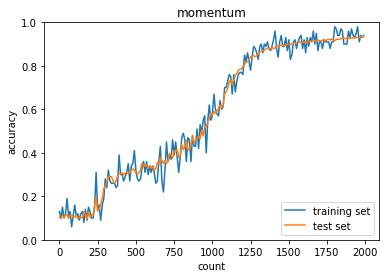

In [54]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("momentum")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 緩やかに収束して行っている

In [55]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='sigmoid', 
                        weight_init_std=0.01,
                        use_batchnorm=False)

* 再び初期化